In [15]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [17]:
import pandas as pd
pd.__version__

'1.1.5'

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [51]:
data=pd.read_csv('/content/final_training_data.csv')
data.head()

,sentence,ipo_status,funding_status,m&a_status,investment_status,parnership_status,product_launch_status,government_regulations_status,product_survey_status,market_growth_status
0,The Daily Beast\n\nPoolPrince Harry and Meghan...,n,n,n,n,n,n,n,n,n
1,"Meghan, 39, said in the interview, âYou know...",n,n,n,n,n,n,n,n,n
2,No one knows that.,n,n,n,n,n,n,n,n,n
3,The vows that we have framed in our room are j...,n,n,n,n,n,n,n,n,n
4,"Others argued, however, that Meghan was merely...",n,n,n,n,n,n,n,n,n


In [19]:
data['Category class'].value_counts()

Technologies                                  107
company announcements or information          103
Innovation                                    103
awards and recognition                        103
Research and development                      101
Junk                                          100
Product Launch                                100
collaboration or agreement or partnerships     98
Name: Category class, dtype: int64

In [ ]:
data['Domain_Type'] = data['Domain_Type'].replace({'Syndicate Domain':1,'News Domain':2,'Consultancy Domain':3})
#data['Domain_Type'].astype(int)

In [ ]:
# checking unique value of review and followers and their counts
data['Description'].isna().sum()
#data.dropna(inplace=True)
#data

0

In [ ]:
data.isnull().sum()

Unnamed: 0     86
Domain         12
Description     0
Domain_Type     0
dtype: int64

In [ ]:
d2=data[['Domain','Description','Domain_Type']]
#d2 = d2.dropna(inplace=True)
d2.head()

,Domain,Description,Domain_Type
0,https://servest.co.za,Our high-performance culture is focused on our...,Syndicate Domain
1,https://tsx.com,The Exchanges have provided companies with acc...,Syndicate Domain
2,https://eastspring.com,"Eastspring Investments, part of Prudential plc...",Syndicate Domain
3,https://financialbuzz.com,It seems we can’t find what you’re looking for...,News Domain
4,https://aarkstore.com,Aarkstore Enterprise is among global marketing...,Syndicate Domain


In [20]:
# Data Preprocessing 
data['sentence_lower'] = data["Sentences"].str.lower() # converting text into lower
data['sentence_no_punctuation'] = data['sentence_lower'].str.replace('[^\w\s]','')# replace white and non white space characters by ''
#d2['sentence_no_punctuation'] = d2["sentence_no_punctuation"].fillna("fillna")# replace null values by fillna
#for i in d2['sentence_no_punctuation'].values:
    #review = re.sub('[^a-zA-Z]',' ',dff['sentence_no_punctuation'][i])# getting alphabets only and eliminating others
    #review = review.lower()# convert into lower letters
    #review = i.split()
    #review = d2['sentence_no_punctuation'][i].split()# splitting sentences
    #review = [ps.stem(word) for word in review if not word in stopwords.words('english')]# removing stop words
    #review = ' '.join(review)
    #d2['sentence_no_punctuation'].append(review)
    #d2['sentence'] = review    
#d2['sentence_no_punctuation'] = review 
#d2['sentence_no_punctuation'] = d2['sentence_no_punctuation'].split() 
#d2['sentence] = [ps.stem(word) for word in review if not word in stopwords.words('english')]  


In [21]:
data.head()

,Sentences,Category class,sentence_lower,sentence_no_punctuation
0,"Meesho launched Farmiso, a product that anyone...",Product Launch,"meesho launched farmiso, a product that anyone...",meesho launched farmiso a product that anyone ...
1,TCEB LAUNCHES ‘MICE WINNOVATION’ TO GIVE MICE ...,Product Launch,tceb launches ‘mice winnovation’ to give mice ...,tceb launches mice winnovation to give mice en...
2,"On April 6th, 2021, Niu Technologies launched ...",Product Launch,"on april 6th, 2021, niu technologies launched ...",on april 6th 2021 niu technologies launched 4 ...
3,Niu Technologies also launched a new series fo...,Product Launch,niu technologies also launched a new series fo...,niu technologies also launched a new series fo...
4,Reliance is expected to complete the developme...,Product Launch,reliance is expected to complete the developme...,reliance is expected to complete the developme...


In [ ]:
def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [ps.stem(token) for token in tokens if not token in stopwords.words('english')]
    return ' '.join(stemmed_tokens)

d2['stemmed'] = d2['sentence_no_punctuation'].apply(stem_sentences)



In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

def lemmatization(sentence):
  tokens = sentence.split()
  lemma_tokens = [lemma.lemmatize(token) for token in tokens if not token in stopwords.words('english')]
  return ' '.join(lemma_tokens)

data['lemma'] = data['sentence_no_punctuation'].apply(lemmatization)  

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data.head()

,description,category_class,sentence_lower,sentence_no_punctuation,lemma
0,Research and development services our r&d team...,research and development,research and development services our r&d team...,research and development services our rd team ...,research development service rd team constantl...
1,Motion capture laboratories are often large sp...,research and development,motion capture laboratories are often large sp...,motion capture laboratories are often large sp...,motion capture laboratory often large space op...
2,"R&d projectsnucaps, within its business plan a...",research and development,"r&d projectsnucaps, within its business plan a...",rd projectsnucaps within its business plan and...,rd projectsnucaps within business plan activit...
3,Past projects include: research to prevent bli...,research and development,past projects include: research to prevent bli...,past projects include research to prevent blin...,past project include research prevent blindnes...
4,Current projects: study of safety and efficacy...,research and development,current projects: study of safety and efficacy...,current projects study of safety and efficacy ...,current project study safety efficacy advanced...


In [ ]:
X = data['lemma']

In [ ]:
d2.to_csv("Dat_d.csv", index=True)

In [ ]:
d2['stemmed'].dropna(inplace=True)
d2['stemmed']

0      come protect what valuabl dont settl second be...
1      highperform cultur focus custom develop serves...
2      exchang provid compani access equiti capit 160...
3      search suggest team collabor team member team ...
4      eastspr invest part prudenti plc global asset ...
                             ...                        
820    fenetr partner lead consult firm market entri ...
821    intern provid research consult programm manag ...
822    btc eur classic view btc eur bch eur eth eur b...
823    splashbi help organ make best busi decis provi...
824    evora global profession real estat sustain con...
Name: stemmed, Length: 633, dtype: object

In [23]:

data = data.sample(frac=1).reset_index(drop=True)
#d2.tail()
data.head()

,Sentences,Category class,sentence_lower,sentence_no_punctuation
0,"Like other emerging countries before it, china...",Junk,"like other emerging countries before it, china...",like other emerging countries before it china ...
1,Jsw is setting the benchmark in drilling autom...,Technologies,jsw is setting the benchmark in drilling autom...,jsw is setting the benchmark in drilling autom...
2,We employ more than 300 scientists and enginee...,Research and development,we employ more than 300 scientists and enginee...,we employ more than 300 scientists and enginee...
3,Motion capture laboratories are often large sp...,Research and development,motion capture laboratories are often large sp...,motion capture laboratories are often large sp...
4,Webgl (web graphics library) is a javascript-b...,Technologies,webgl (web graphics library) is a javascript-b...,webgl web graphics library is a javascriptbase...


In [24]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

# Initialize empty array 
# to append clean text  
corpus = []
#for i in range(0, len(data)):
for i in data['sentence_no_punctuation'].values:
    #review = re.sub('[^a-zA-Z]',' ',dff['sentence_no_punctuation'][i])# getting alphabets only and eliminating others
    #review = review.lower()# convert into lower letters
    review = i.split()
    #review = d2['sentence_no_punctuation'][i].split()# splitting sentences
    review = [lemma.lemmatize(token) for token in review if not token in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

corpus    

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['like emerging country china changing way unlike developed market rapid urbanization growing middle class two trend driving formation innovative company cater trend china population 14bn gained purchasing power chinese company ever focusing domestic consumption service come expense industry connected china past economic strength farming mining trend suggest expanding opportunity china fixed income equity market',
 'jsw setting benchmark drilling automation customdeveloped integrated business system deliver quality realtime accurate drill production data company patenting several new technology enhance capability drill automation application live data',
 'employ 300 scientist engineer around world dedicated research development rd lubricant fuel vehicle shipping aircraft',
 'motion capture laboratory often large space optimally designed research teaching address challenge group university nebraska omaha goal',
 'webgl web graphic library javascriptbased api rendering 3d graphic within 

In [ ]:
# vectorize the words in corpus using count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
x = cv.fit_transform(corpus).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
# using tfidf for giving weight to the words depends on their no of occurences
tfidf = TfidfTransformer()
X = tfidf.fit_transform(x)
X = tfidf.transform(x)
X.shape

(759, 5752)

In [ ]:
X

<759x5752 sparse matrix of type '<class 'numpy.float64'>'
	with 21346 stored elements in Compressed Sparse Row format>

In [25]:
y=data['Category class']
#y=y.astype('int')

#y=y.replace('Like','4')
#y.unique()
y.value_counts()

Technologies                                  107
company announcements or information          103
Innovation                                    103
awards and recognition                        103
Research and development                      101
Junk                                          100
Product Launch                                100
collaboration or agreement or partnerships     98
Name: Category class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


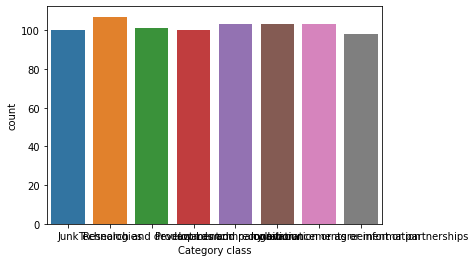

In [26]:
import seaborn as sns
sns.countplot(y)# checking whether it is imbalanced or balanced dataset

In [ ]:
from collections import Counter
Counter(y)

Counter({1: 156, 2: 157, 3: 135})

## Model

In [ ]:
!pip install lazypredict

     |████████████████████████████████| 307kB 17.5MB/s 
     |████████████████████████████████| 256kB 25.0MB/s 
     |████████████████████████████████| 1.2MB 30.1MB/s 
     |████████████████████████████████| 10.1MB 47.2MB/s 
     |████████████████████████████████| 6.8MB 40.7MB/s 
     |████████████████████████████████| 14.5MB 35.2MB/s 
     |████████████████████████████████| 276kB 39.8MB/s 
     |████████████████████████████████| 81kB 8.4MB/s 
     |████████████████████████████████| 25.9MB 1.5MB/s 
     |████████████████████████████████| 127.6MB 42kB/s 
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44620 sha256=6cf05cfbb3c6f9ffea4e04e73e4031025f0c4abcf820b88a37ea762185729ac4
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully built PyYAML
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.19.1 which is incompatible.
ERROR: google-colab 1.0.0 has requireme

In [ ]:
from lazypredict.Supervised import LazyClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.


In [ ]:
X=data['lemma']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)


In [ ]:
clf=LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

AttributeError: ignored

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor

#metrics evaluation
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,f1_score,confusion_matrix,classification_report,cohen_kappa_score


In [ ]:
result_tab=pd.DataFrame(columns=['Model_Name','Model'])

In [ ]:
#Building models and evaluating metrics

models=[LogisticRegression(multi_class='ovr'),SVC(kernel='linear',probability=True), XGBClassifier()]

def func(model_name):
    for i in models:
        
        global result_tab
        
        print(str(i).upper())
        print()
        
        method=i
        method.fit(X_train,y_train)
        y_pred=method.predict(X_test)
        
        pred_prob1 = method.predict_proba(X_test)
        
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
        confusion_mat=confusion_matrix(y_pred,y_test)
        
        print("classification report:   ",classification_report(y_pred,y_test))
        print('PPV: ', 100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[1][0]))
        print('NPV: ', 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[0][1]))

        plt.plot(fpr1, tpr1, color='orange', label='ROC')
        plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend()
        plt.show()
        print()
        
        modd=pd.Series({'Model_name':str(model_name)[0:10],
                        'Model': str(i),
                    'AUC Score' : roc_auc_score(y_test, pred_prob1,average='weighted',multi_class='ovr'),
                    'Precision Score': metrics.precision_score(y_test, y_pred,average = 'weighted'),
                    'Recall Score': metrics.recall_score(y_test, y_pred, average = 'weighted'),
                    'Accuracy Score': metrics.accuracy_score(y_test, y_pred),
                    'Kappa Score': cohen_kappa_score(y_test, y_pred),
                    'f1-score': f1_score(y_test, y_pred,average = 'weighted'),
                    "accuracy_score": accuracy_score(y_pred,y_test),
                   "confusion matrix":confusion_matrix(y_pred,y_test)})
                    #'Sensitivity':100*confusion_mat[0][0]/(confusion_mat[0][0]+confusion_mat[0][1]),
                    #'Specificity': 100*confusion_mat[1][1]/(confusion_mat[1][1]+confusion_mat[1][0])})
        
        result_tab=result_tab.append(modd,ignore_index=True)
        
    return result_tab


In [ ]:
func('base')

LOGISTICREGRESSION(C=1.0, CLASS_WEIGHT=NONE, DUAL=FALSE, FIT_INTERCEPT=TRUE,
                   INTERCEPT_SCALING=1, L1_RATIO=NONE, MAX_ITER=100,
                   MULTI_CLASS='OVR', N_JOBS=NONE, PENALTY='L2',
                   RANDOM_STATE=NONE, SOLVER='LBFGS', TOL=0.0001, VERBOSE=0,
                   WARM_START=FALSE)



ValueError: ignored

In [ ]:
result_tab

#2nd Approach

In [ ]:
#Entire Data for Training

import pickle
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.2)
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(XGBClassifier()))])
model.fit(X_train,y_train)

#filename = 'Final_model.sav'
#pickle.dump(model, open(filename, 'wb'))

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabula...
                                                                     max_delta_step=None,
                                                                     max_depth=None,
                                                                     min_child_weight=None,
                                                                     

In [ ]:
calc = model.predict(X_test)
#model.predict(When it comes to protecting whats most valuable to you, dont settle on second best. ADT is America's #1 security provider for home and business. It was the first home security company in America and now helps protect more than 6 million customers in North America. Whether you are welcoming a new family member into your home or looking to replace outdated security monitoring, SafeStreets has the latest equipment and a knowledgeable service team to deliver the best protection possible. With an ADT monitored alarm system from SafeStreets, your home is connected to a comprehensive monitoring network of command centers located throughout the United States. The advanced home security technology along with expertly trained professionals exhibit ADT's dedication to protecting customers. When you sign up for ADT home security monitoring, you join over 6 million people who trust ADT monitoring to help protect their families. ADT is America's #1 home security monitoring company with over 140 years of experience in the industry. When you choose SafeStreets, you can get same-day installation in most areas. ADT Monitoring comes with an ADT Money-back Service Guarantee (certain restrictions apply), making sure you are a satisfied customer. When you compare ADT monitoring from SafeStreets to other providers, you'll see why ADT monitoring continues to be one of the number one choices for customers across the country. Use your keychain remote to arm or disarm your security system with a simple touch of a button. With a SafeStreets security system, you dont have to learn an intricate system in order to get the home monitoring security you want. If your home alarm signals, ADT will call the primary contacts first before notifying local authorities for help in an emergency situation so they can respond promptly at your home. Delivering peace of mind is the number one goal. ADT monitored home protection from SafeStreets is available for a low monthly price so you can get the protection your family needs without breaking your budget. ADT monitoring from SafeStreets doesn't stop. Even when the power goes out, your backup battery will keep your system up and running. You can choose from basic home security, basic plus wireless functionality, remote access, and video control optionsall at affordable monthly prices. Let SafeStreets help you get the right security system to help protect your home and family today. Countless people are moving to Austin, TX every year to take part in this diverse and prosperous cityand perhaps you are too. As the state capital, its a thriving metropolis that isnt short on personality and charm. Some of Austins greatest attractions include the citys weather, culture and ample employment opportunitiesbut its not without its [] Learn more about ADT Monitoring near you: Alabama | Alaska | Arizona | Arkansas | California | Colorado | Connecticut | Delaware | District of Columbia | Florida | Georgia | Hawaii | Idaho | Illinois | Indiana | Iowa | Kansas | Kentucky | Louisiana | Maine | Massachusetts | Maryland | Michigan | Minnesota | Missouri | Mississippi | Montana | Nebraska | Nevada | New Hampshire | New Jersey | New Mexico | New York | North Carolina | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Carolina | South Dakota | Tennessee | Texas | Utah |  Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming)
#final_value = 
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,f1_score,confusion_matrix,classification_report,cohen_kappa_score


print("Train Accuracy :", accuracy_score(y_train,trained_model.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, calc))
print("Confusion Matrix :", confusion_matrix(y_test, calc) )

Train Accuracy : 0.9039301310043668
Test Accuracy : 0.4011627906976744
Confusion Matrix : [[ 5  1  1  3  0  0  3  2  2]
 [ 1  7  0  1  3  1  1  7  0]
 [ 4  2  6  6  2  1  2  5  1]
 [ 1  1  1  5  1  1  0  3  1]
 [ 0  0  0  0  9  0  0  2  4]
 [ 0  1  1  0  0 10  1  3  1]
 [ 0  0  1  4  0  1  2 10  2]
 [ 0  1  0  4  0  1  3  7  0]
 [ 1  0  0  1  0  1  0  2 18]]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(LinearSVC(class_weight="balanced")))])

In [ ]:
X_train

,Domain,lemma
207,http://seopros.org,quite time belief consumer due diligence howev...
1107,http://sdbullion.com,since starting 2012 sd bullion grown one large...
274,https://www.catalystmr.com/,catalystmr experienced customer driven market ...
76,http://okex.com,okex innovative cryptocurrency exchange advanc...
773,http://ashokleyland.com,ashok leyland flagship hinduja group 2nd large...
...,...,...
715,http://hanglung.com,commitment better tomorrow part hang lung visi...
905,https://tcs.com,global leader service digital business solutio...
1096,https://isg-one.com,isg information service group nasdaq iii leadi...
235,http://info.isg-one.com,isg information service group nasdaq iii leadi...


In [ ]:
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 3), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabula...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('clf',
                 CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0,
                                                                 class_weight='balanced',
                  

In [ ]:
X_test

,Domain,lemma
479,http://codycrossanswers.com,fellow visitor site please find codycross answ...
672,https://artezio.com,artezio international consulting company lever...
972,http://saglobal.com,group consultant bunch keen listener troop pro...
81,https://ensia.com,know pivotal time global climate change biodiv...
725,http://centreforpublicimpact.org,work government public servant changemakers re...
...,...,...
967,https://cowi.com,cowi leading consulting group creates value cu...
348,https://ezybizindia.in,ezybiz india multidisciplinary consulting firm...
242,http://omcp.org,longer enough simply _claim_ expertise online ...
464,http://weeklywall.com,report present authentic accurate research stu...


In [ ]:
x_test = pd.DataFrame(X_test)
x_test.to_csv("xtest2.csv")

In [ ]:
y_T_test = pd.DataFrame(y_test)
y_T_test.to_csv("ytest2.csv")

In [ ]:
y_test

479                 Junk Domain
672          Consultancy Domain
972             Priority Domain
81                  News Domain
725    Education/Org/Gov Domain
                 ...           
967          Consultancy Domain
348          Consultancy Domain
242    Education/Org/Gov Domain
464            Syndicate Domain
329    Education/Org/Gov Domain
Name: Domain_Type, Length: 225, dtype: object

In [ ]:
calc = model.predict(X_test)
calc

array(['Emerging Technologies  ', 'Emerging Technologies  ',
       'Emerging Technologies  ', 'company announcements or information',
       'Technology Development', 'awards and recognition',
       'Technology Development', 'Emerging Technologies  ',
       'Technology Development', 'company announcements or information',
       'Emerging Technologies  ', 'company announcements or information',
       'Emerging Technologies  ', 'company announcements or information',
       'Technology Development', 'company announcements or information',
       'Emerging Technologies  ', 'company announcements or information',
       'Emerging Technologies  ', 'Technology Development',
       'Emerging Technologies  ', 'Innovation ', 'Technology Development',
       'Emerging Technologies  ', 'Innovation ',
       'Emerging Technologies  ', 'company announcements or information',
       'research and development ', 'Technology Development',
       'Technology Development', 'Emerging Technologies  '

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, calc)

0.13815789473684212

In [ ]:
calc = pd.DataFrame(calc)
calc.to_csv("calc2.csv")

In [ ]:
c=pd.concat([pd.DataFrame(X_test),pd.DataFrame(y_test),pd.DataFrame(calc)], axis=1)
c.to_csv("Description2.csv", index=True)


#Testing for new data


In [49]:
import pickle

filename = '/content/TC_final_model.sav'
loaded_model = pickle.load(open(filename, 'rb'))


from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [50]:
import pandas as pd

def class_prediction(output):
    class_names = []
    try:
        output=output.lower()
        output=output.replace('[^\w\s]','')
        output = output.split()
        # review = d2['sentence_no_punctuation'][i].split()# splitting sentences
        output = [lemma.lemmatize(word) for word in output if not word in stopwords.words('english')]  # removing stop words
        output = ' '.join(output)

        filename = '/content/TC_final_model.sav'
        loaded_model = pickle.load(open(filename, 'rb'))
        class_names = loaded_model.predict([output])
        #print(class_name)
    except Exception as exe:
        print("Exception in domain_prediction", exe)
    return class_names



if __name__=='__main__':

    df = pd.read_excel("/content/Text_classification_training_data_100 (7).xlsx",sheet_name='model_testing_with_junk')
    #t1 = time.time()
    lst1=[]
    lst2=[]
    for i in df['Sentences'].values:
        sentence = i
        #description = company_description_extraction(url)
        #lst1.append(description)
        class_name=class_prediction(sentence)
        lst2.append(class_name)

    ab=pd.concat([df,pd.DataFrame(lst2)], axis=1)
    ab.to_csv("Class_Prediction.csv", index=True)
    #t2 = time.time()

In [ ]:

    

def get_pdf_url():
    try:
        input_df = pd.read_excel('/content/Text_classification_training_data_100 (4).xlsx',sheet_name='test')
        df = pd.DataFrame(columns=['input_url', 'extracted_url', 'domain_url'])
        for i in range(input_df.shape[0]):
            url = input_df.iloc[i, input_df.columns.get_loc("input_urls")]
            manual_class = input_df.iloc[i, input_df.columns.get_loc("manual_class")]
            
            url = url.replace(' ', '%20')
            print('input url is--->', url)
            result = extract_pdf_url(url)
            print(result)
            print('no of urls----->', len(result))
            for pdf_url in result:
                domain_url = get_domain_name(pdf_url)
                ouput_dt = [{​​​​​​​​'input_url': url, 'extracted_url': pdf_url, 'domain_url': domain_url}​​​​​​​​]
                df = df.append(ouput_dt, ignore_index=True)
            print(df)
        df.to_csv('pdf_url.csv', index=False)
    except Exception as exe:
        print("Exception in get_pdf_url", exe)




In [ ]:
X=data['lemma']

In [40]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.2)
#shape of train dataset - 
model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(LinearSVC(class_weight="balanced")))])

trained_model = model.fit(X_train,y_train)
trained_model.fit(X_train,y_train)
calc = model.predict(X_test)
#model.predict(When it comes to protecting whats most valuable to you, dont settle on second best. ADT is America's #1 security provider for home and business. It was the first home security company in America and now helps protect more than 6 million customers in North America. Whether you are welcoming a new family member into your home or looking to replace outdated security monitoring, SafeStreets has the latest equipment and a knowledgeable service team to deliver the best protection possible. With an ADT monitored alarm system from SafeStreets, your home is connected to a comprehensive monitoring network of command centers located throughout the United States. The advanced home security technology along with expertly trained professionals exhibit ADT's dedication to protecting customers. When you sign up for ADT home security monitoring, you join over 6 million people who trust ADT monitoring to help protect their families. ADT is America's #1 home security monitoring company with over 140 years of experience in the industry. When you choose SafeStreets, you can get same-day installation in most areas. ADT Monitoring comes with an ADT Money-back Service Guarantee (certain restrictions apply), making sure you are a satisfied customer. When you compare ADT monitoring from SafeStreets to other providers, you'll see why ADT monitoring continues to be one of the number one choices for customers across the country. Use your keychain remote to arm or disarm your security system with a simple touch of a button. With a SafeStreets security system, you dont have to learn an intricate system in order to get the home monitoring security you want. If your home alarm signals, ADT will call the primary contacts first before notifying local authorities for help in an emergency situation so they can respond promptly at your home. Delivering peace of mind is the number one goal. ADT monitored home protection from SafeStreets is available for a low monthly price so you can get the protection your family needs without breaking your budget. ADT monitoring from SafeStreets doesn't stop. Even when the power goes out, your backup battery will keep your system up and running. You can choose from basic home security, basic plus wireless functionality, remote access, and video control optionsall at affordable monthly prices. Let SafeStreets help you get the right security system to help protect your home and family today. Countless people are moving to Austin, TX every year to take part in this diverse and prosperous cityand perhaps you are too. As the state capital, its a thriving metropolis that isnt short on personality and charm. Some of Austins greatest attractions include the citys weather, culture and ample employment opportunitiesbut its not without its [] Learn more about ADT Monitoring near you: Alabama | Alaska | Arizona | Arkansas | California | Colorado | Connecticut | Delaware | District of Columbia | Florida | Georgia | Hawaii | Idaho | Illinois | Indiana | Iowa | Kansas | Kentucky | Louisiana | Maine | Massachusetts | Maryland | Michigan | Minnesota | Missouri | Mississippi | Montana | Nebraska | Nevada | New Hampshire | New Jersey | New Mexico | New York | North Carolina | North Dakota | Ohio | Oklahoma | Oregon | Pennsylvania | Rhode Island | South Carolina | South Dakota | Tennessee | Texas | Utah |  Vermont | Virginia | Washington | West Virginia | Wisconsin | Wyoming)
#final_value = 
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,f1_score,confusion_matrix,classification_report,cohen_kappa_score


print("Train Accuracy :", accuracy_score(y_train,trained_model.predict(X_train)))
print("Test Accuracy :", accuracy_score(y_test, calc))
print("Confusion Matrix :", confusion_matrix(y_test, calc) )

Train Accuracy : 0.9984662576687117
Test Accuracy : 0.7361963190184049
Confusion Matrix : [[18  1  1  0  3  0  1  4]
 [ 0 24  0  0  1  0  0  1]
 [ 1  0 22  0  0  0  0  1]
 [ 0  0  0  9  2  0  1  1]
 [ 0  1  0  1 16  0  1  3]
 [ 0  0  0  0  0 13  1  0]
 [ 2  1  1  3  0  0  9  2]
 [ 5  2  0  0  2  0  0  9]]


In [48]:
# (y_train)
import pickle
#result = model.predict(X_test)
#print(result)

filename = 'TC_final_model.sav'
pickle.dump(model, open(filename, 'wb'))


#load the model from disk
#filename = 'Final_model.sav'
#loaded_model = pickle.load(open(filename, 'rb'))

In [ ]:
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,accuracy_score,f1_score,confusion_matrix,classification_report,cohen_kappa_score

result = model.predict([X_test])
accuracy_score(y_test,result)

In [ ]:
input='They build algorithms focused on stream processing for detection and detailed analysis for investigation. after an initial project to detect online payment fraud, the centai is broadening its research scope to other aspects of cybersecurity'
model.predict([input])

array(['research and development  or research '], dtype='<U62')

In [ ]:
input='Here at thales in the uk, we re innovators. in partnership with leaders in academia and industry we deliver ground-breaking research, cutting-edge design and transformative technology that drives growth in the uk and beyond'
model.predict([input])

array(['collaboration or agreement or partnerships'], dtype='<U62')

In [ ]:
input='5g and iot - 5g and iot technology is more than just a new generation of wireless technology. it represents a fundamental change in the mobile ecosystem, unleashing a powerful combination of extraordinary speed, expanded bandwidth, low latency, and increased power efficiency that is driving billions more connections in the next five years and changing our world.'
model.predict([input])

array(['innovation'], dtype='<U62')

In [ ]:
input='We ve learnt that magic happens when the lines blur between work and play. thats why we invest in regular team hackathons, innovation sprints  design sprints.'
model.predict([input])

array(['company announcements or information'], dtype='<U62')

In [ ]:
input='For over 100 years, thales has been at the heart of all the major technological revolutions, including electricity, electronics, and computing.'
model.predict([input])

array(['innovation'], dtype='<U62')

In [ ]:
input='Thales electrical systems for aircraft are replacing pneumatic and hydraulic technologies, helping to reduce weight and save fuel. thales aims to achieve a 50% cut in co2 emissions and 80% cut in nox emissions by 2020 and is working towards the all-electric aircraft of the future.'
model.predict([input])

array(['innovation'], dtype='<U62')

In [ ]:
input='You will also discover the unexpected riches of diamonds as well as the latest advances in augmented reality.'
model.predict([input])

array(['Product Launch'], dtype='<U62')

In [ ]:
input='University of bologna - department of electronics, information technology and systems theory - collaboration contract on the impulse radio for multidomain applications (irma) research topic; starting collaboration contract on the cognitive radio for the spectrum dynamic management" research topic'
model.predict([input])

array(['research and development  or research '], dtype='<U62')

In [ ]:
input='Microsoft Azure is a growing collection of integrated cloud services—analytics, computing, database, mobile, networking, storage, and web—for moving faster, achieving more, and saving money. Here’s what you can do with Azure…'
model.predict([input])

array(['Technology Development or Emerging Technologies (Technologies)'],
      dtype='<U62')

In [ ]:
input='NEC is engaged in R&D to create new social value by establishing six technology areas “recognition AI,” “analytics AI,” “control AI,” “system platform,” “communication,” and “security & network.'
model.predict([input])

array(['Technology Development or Emerging Technologies (Technologies)'],
      dtype='<U62')

In [ ]:
input='NEC is engaged in Research and Development'
model.predict([input])

array(['research and development  or research '], dtype='<U62')

In [ ]:
input='Innovation cannot happen without ideas. by generating many ideas, the teams explore new possibilities to innovate and look beyond what has already been done. the ideas are developed into strong concepts that solves real business problems.'
model.predict([input])

array(['innovation'], dtype='<U62')

# KFold

In [41]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=4, shuffle=True, random_state = 42)


In [43]:
from numpy import mean
from numpy import std
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score, cross_val_predict

model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(LinearSVC(class_weight="balanced")))])

scores = cross_val_score(model, corpus, y, scoring = 'accuracy', cv=kfold, n_jobs = -1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.702 (0.017)


#Rep

In [ ]:
from sklearn.model_selection import RepeatedKFold
fold = RepeatedKFold(n_splits=5, n_repeats = 5, random_state=1)

In [ ]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score, cross_val_predict

model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))),
    ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(LinearSVC(class_weight="balanced")))])

scores = cross_val_score(model, d2['lemma'], y, scoring = 'accuracy', cv=fold, n_jobs = -1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.623 (0.024)


In [ ]:
#input="ascendant consulting firm offer first class market research service focus providing client information allows accurate confident decision making market assessment market entry expansion planning client depend ascendant consulting firm market research result drive creation strategy solution effectively achieve customer retention new customer acquisition competitive advantage accurate market viabilityfeasibility team comprised academic professional collectively 95 year practical expertise qualitative quantitative market research analysis advanced quantitative analytics strategic marketing financial analysis analytics"
input="latest television news including story relating channel network tv broadcaster get newest story new season lineup series premiere sport coverage find information growing link traditional television new medium announcement new partnership online contest opportunity audience engagement keep eye recent viewing figure financial report major network communication group songtradr world largest b2b music licensing marketplace announced today acquired song zu awarded music sound timetofinds mission simple want help consumer speed dating authorised retailer watch want stock home entertainment industry transition digital streaming look nearly complete digital content streaming industry still enghouse network pleased announce conway corporation leveraged enghouse espialtv saas platform strengthen delivery tv xiaomi partnering airconsole distribution airconsoles multiplayer cloud gaming platform app featured xiaomis harvard study published last july reported communist party china cpc high rate support satisfaction among chinese c seed proudly present revolutionary m1 marking new state art package tv technology design sculpturelike column rise new eightepisode documentary poverty explores inside story china successful eradication extreme poverty produced fundamental purpose serving people heart soul communist party china cpc devoted leading nation towards cfi financial group leading online trading service provider announced new partnership famous middle eastern tv presenter corsearch inc pleased announce acquisition entura pioneer protection content online piracy following starzplay region home anime 1000 episode anime content brought subscriber tv tokyo corporation evening february 12 gmt 800 first day new year 2021 according chinese lunar calendar video program hakka disturb uk number 1 musicbased tv channel thats tv rebrand thats 60 freeview weekend first time sponsored overseas chinese affair office state council organized hunan broadcasting system worldwide celebration chinese new year strong tv campaign help increase awareness echo online nh prescription service online pharmacy agency called ekstasy may seem annual spring festival gala one china mostwatched program year festival also feature new us technology according house givenchy pleased announce canadian singer weeknd wore custom outfit designed creative director matthew amazon original series hitoshi matsumoto present freeze season 2 produced japan yoshimoto kogyo co ltd streamed amazon iwedia leading provider software solution tv device pleased announce appointment xavier marl director sale wednesday mark lichun first solar term year considered beginning spring chinese saying go whole year work according new market research report cloud tv market deployment type public cloud private cloud device type stbs mobilelondon march 10 2021 prnewswire highlight average spend uk credit card fell 14 percent 570 payment percentage balance reached two year high percentage account balance missing two payment continued increase proportion consumer using cash continued"
model.predict([input])

array(['News Domain'], dtype='<U18')

## Logistic Regression

In [ ]:
X=data['lemma']

model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))),
                  ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(LogisticRegression(multi_class='ovr')))])

In [47]:
import pickle
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(corpus,y,test_size=0.2,random_state=1)

model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))),
                  ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(LogisticRegression(multi_class='ovr')))])

trained_model = model.fit(X_train, y_train)
out = model.predict(X_test)
print("Train Accuracy: ", accuracy_score(y_train, trained_model.predict(X_train)))
print("Test Accuracy: ",accuracy_score(y_test,out))

Train Accuracy:  0.995398773006135
Test Accuracy:  0.7300613496932515


In [46]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score, cross_val_predict

from sklearn.model_selection import KFold
kfold = KFold(n_splits=4, shuffle=True, random_state = 1)

model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))),
                  ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(LogisticRegression(multi_class='ovr')))])

scores = cross_val_score(model, corpus, y, scoring = 'accuracy', cv=kfold, n_jobs = -1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.734 (0.014)


In [ ]:
from sklearn.model_selection import RepeatedKFold
fold = RepeatedKFold(n_splits=4, n_repeats = 3, random_state=1)

from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score, cross_val_predict

model = Pipeline([('vectorizer', CountVectorizer(ngram_range=(1,3))),
                  ('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(LogisticRegression(multi_class='ovr')))])

scores = cross_val_score(model, d2['lemma'], y, scoring = 'accuracy', cv=fold, n_jobs = -1)
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Accuracy: 0.614 (0.020)


######

#Hyper-Parameter Tuning

In [ ]:
model=LogisticRegression(multi_class='ovr')
space = dict()
space['solver']=['newton-cg','lbfgs', 'liblinear']
space['penalty']=['none', 'l1', 'l2', 'elasticnet']
#space['multi_class']=['auto','ovr','multinomial']
space['C']=[100,10,1.0,0.1,0.01]
#solvers=
#penalty=
#c_values=

#Grid Search

#grid = dict(solvers=solvers, penalty=penalty, C=C)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(estimator=model, param_grid=space, n_jobs=-1, scoring='accuracy',error_score=0)
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)



In [ ]:
model.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [ ]:
model = Pipeline([('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(LinearSVC(class_weight="balanced")))])
#model=LogisticRegression(multi_class='ovr')
space = dict()
space['clf__base_estimator__multi_class']=['ovr', 'crammer_singer']
space['clf__base_estimator__penalty']=['l1', 'l2']
#space['multi_class']=['auto','ovr','multinomial']
space['clf__base_estimator__C']=[100,10,1.0,0.1,0.01]
#solvers=
#penalty=
#c_values=

#Grid Search

#grid = dict(solvers=solvers, penalty=penalty, C=C)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
search = GridSearchCV(estimator=model, param_grid=space, n_jobs=-1, scoring='accuracy', error_score=0)
result = search.fit(X_train, y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)




Best Score: 0.5527905785970302
Best Hyperparameters: {'clf__base_estimator__C': 1.0, 'clf__base_estimator__multi_class': 'ovr', 'clf__base_estimator__penalty': 'l2'}


In [ ]:
model.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'tfidf', 'clf', 'tfidf__norm', 'tfidf__smooth_idf', 'tfidf__sublinear_tf', 'tfidf__use_idf', 'clf__base_estimator__C', 'clf__base_estimator__class_weight', 'clf__base_estimator__dual', 'clf__base_estimator__fit_intercept', 'clf__base_estimator__intercept_scaling', 'clf__base_estimator__l1_ratio', 'clf__base_estimator__max_iter', 'clf__base_estimator__multi_class', 'clf__base_estimator__n_jobs', 'clf__base_estimator__penalty', 'clf__base_estimator__random_state', 'clf__base_estimator__solver', 'clf__base_estimator__tol', 'clf__base_estimator__verbose', 'clf__base_estimator__warm_start', 'clf__base_estimator', 'clf__cv', 'clf__method'])

In [ ]:
#Randomised Search

model = Pipeline([('tfidf', TfidfTransformer(use_idf=True)),
    ('clf', CalibratedClassifierCV(LogisticRegression(multi_class='ovr')))])
#model=LogisticRegression(multi_class='ovr')
space = dict()
space['clf__base_estimator__solver']=['newton-cg','lbfgs', 'liblinear']
space['clf__base_estimator__penalty']=['none', 'l1', 'l2', 'elasticnet']
#space['multi_class']=['auto','ovr','multinomial']
space['clf__base_estimator__C']=[100,10,1.0,0.1,0.01]


#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
#space = dict(solvers=solvers, penalty=penalty, C=c_values)
search = RandomizedSearchCV(model, space, n_iter=200, scoring='accuracy', n_jobs=-1, random_state=1)
result = search.fit(X_train,y_train)
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 60 is smaller than n_iter=200. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Best Score: 0.5625192012288787
Best Hyperparameters: {'clf__base_estimator__solver': 'liblinear', 'clf__base_estimator__penalty': 'l1', 'clf__base_estimator__C': 10}


#FastText

In [ ]:
! git clone https://github.com/facebookresearch/fastText.git

Cloning into 'fastText'...
remote: Enumerating objects: 3854, done.
remote: Total 3854 (delta 0), reused 0 (delta 0), pack-reused 3854
Receiving objects: 100% (3854/3854), 8.22 MiB | 22.28 MiB/s, done.
Resolving deltas: 100% (2417/2417), done.


In [ ]:
%cd fastText
!make

/content/fastText
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/args.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/autotune.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/matrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/dictionary.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/loss.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/productquantizer.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/densematrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/quantmatrix.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/vector.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/model.cc
c++ -pthread -std=c++11 -march=native -O3 -funroll-loops -DNDEBUG -c src/utils.cc
c++ -pthread -std=c++11 -march=native -O3 -funrol

In [ ]:
! ./fasttext

usage: fasttext <command> <args>

The commands supported by fasttext are:

  supervised              train a supervised classifier
  quantize                quantize a model to reduce the memory usage
  test                    evaluate a supervised classifier
  test-label              print labels with precision and recall scores
  predict                 predict most likely labels
  predict-prob            predict most likely labels with probabilities
  skipgram                train a skipgram model
  cbow                    train a cbow model
  print-word-vectors      print word vectors given a trained model
  print-sentence-vectors  print sentence vectors given a trained model
  print-ngrams            print ngrams given a trained model and word
  nn                      query for nearest neighbors
  analogies               query for analogies
  dump                    dump arguments,dictionary,input/output vectors



In [ ]:
d2.head()

,Domain,Description,Domain_Type,sentence_lower,sentence_no_punctuation,lemma
0,https://bciglobal.com,Supply Chain Strategy Supply Chain Network Des...,Consultancy Domain,supply chain strategy supply chain network des...,supply chain strategy supply chain network des...,supply chain strategy supply chain network des...
1,https://ummid.com,Ummid.com is owned and published by Awaz Mult...,News Domain,ummid.com is owned and published by awaz mult...,ummidcom is owned and published by awaz multi...,ummidcom owned published awaz multimedia publi...
2,http://jll.de,Die halbjhrlich erscheinende Publikation liefe...,Priority Domain,die halbjhrlich erscheinende publikation liefe...,die halbjhrlich erscheinende publikation liefe...,die halbjhrlich erscheinende publikation liefe...
3,https://mindcommerce.com,Mind Commerce is an information services compa...,Consultancy Domain,mind commerce is an information services compa...,mind commerce is an information services compa...,mind commerce information service company focu...
4,http://saglobal.com,We are a group of consultants a bunch of keen...,Priority Domain,we are a group of consultants a bunch of keen...,we are a group of consultants a bunch of keen...,group consultant bunch keen listener troop pro...


In [ ]:
d3=d2[['Domain_Type','stemmed']]
d3.head()
d3['Domain_Type'].value_counts()

News Domain           172
Consultancy Domain    166
Syndicate Domain      154
Name: Domain_Type, dtype: int64

In [ ]:
d3['Domain_Type']=['__label__'+s.replace(' or ', '$').replace(', or ','$').replace(',','$').replace(' ','_').replace(',','__label__').replace('$$','$').replace('___','__') for s in d3['Domain_Type']]
#d3['Domain_Type'].head()
d3.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Domain_Type,stemmed
0,__label__Syndicate_Domain,group seniorlevel execut identifi need busi ex...
1,__label__Consultancy_Domain,ezybiz india multidisciplinari consult firm fu...
2,__label__Syndicate_Domain,whether search market data across part worldw ...
3,__label__Syndicate_Domain,realli want alway get use websit applic app th...
4,__label__Consultancy_Domain,orion market research omr market research comp...


In [ ]:
d3.tail()

,Domain_Type,stemmed
487,__label__Consultancy_Domain,found 1855 savil one world lead properti agenc...
488,__label__News_Domain,horizont media brand cover wide rang machin pr...
489,__label__News_Domain,book written becom essenti read mani professio...
490,__label__News_Domain,bowl center market 2020 vital geograph region ...
491,__label__News_Domain,unless exercis cancel right pursuant section e...


In [ ]:
d3.to_csv("Domain_data.txt", index=False, sep='\t', header='False') 

In [ ]:
!head Domain_data.txt

In [ ]:
! wc Domain_data.txt

    493  496420 3350363 Domain_data.txt


In [ ]:
! head -n 343 Domain_data.txt > Domain_data.train.txt
# Domain_data.train.txt

In [ ]:
! tail -n 150 Domain_data.txt > Domain_data.valid.txt

In [ ]:
! head Domain_data.valid.txt

In [ ]:
! ./fasttext supervised -input Domain_data.train.txt -output model_Domain_data -lr 1.0 -epoch 50

Read 0M words
Number of words:  24246
Number of labels: 3
Progress: 100.0% words/sec/thread:  438617 lr:  0.000000 avg.loss:  0.126594 ETA:   0h 0m 0s


In [ ]:
! ./fasttext predict model_Domain_data.bin Domain_data.train.txt

In [ ]:
! ./fasttext test model_Domain_data.bin Domain_data.valid.txt

N	150
P@1	0.667
R@1	0.667


In [ ]:
! ./fasttext supervised -input Domain_data.train.txt -output model_Domain_data -lr 1.0 -epoch 50 -wordNgrams 5

Read 0M words
Number of words:  24246
Number of labels: 3
Progress: 100.0% words/sec/thread:   57246 lr:  0.000000 avg.loss:  0.516118 ETA:   0h 0m 0s


In [ ]:
! ./fasttext test model_Domain_data.bin Domain_data.valid.txt

N	150
P@1	0.707
R@1	0.707


 Lemma content

In [ ]:
d4=d2[['Domain_Type','lemma']]
d4.head()

,Domain_Type,lemma
0,Consultancy Domain,supply chain strategy supply chain network des...
1,News Domain,ummidcom owned published awaz multimedia publi...
2,Priority Domain,die halbjhrlich erscheinende publikation liefe...
3,Consultancy Domain,mind commerce information service company focu...
4,Priority Domain,group consultant bunch keen listener troop pro...


In [ ]:
d4['Domain_Type']=['__label__'+s.replace(' or ', '$').replace(', or ','$').replace(',','$').replace(' ','_').replace('$$','$').replace('___','__') for s in d4['Domain_Type']]
#d3['Domain_Type'].head()
#d4.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
d4.head()

,Domain_Type,lemma
0,__label__Consultancy_Domain,supply chain strategy supply chain network des...
1,__label__News_Domain,ummidcom owned published awaz multimedia publi...
2,__label__Priority_Domain,die halbjhrlich erscheinende publikation liefe...
3,__label__Consultancy_Domain,mind commerce information service company focu...
4,__label__Priority_Domain,group consultant bunch keen listener troop pro...


In [ ]:
d4.to_csv("Domain_data.txt", index=False, sep='\t', header='False') 

In [ ]:
! wc Domain_data.txt

   1124  938360 7323251 Domain_data.txt


In [ ]:
! head -n 899 Domain_data.txt > Domain_data.train.txt

In [ ]:
! tail -n 225 Domain_data.txt > Domain_data.valid.txt

In [ ]:
! ./fasttext supervised -input Domain_data.train.txt -output model_Domain_data -lr 1.0 -epoch 30

Read 0M words
Number of words:  49710
Number of labels: 6
Progress: 100.0% words/sec/thread:  402421 lr:  0.000000 avg.loss:  0.259740 ETA:   0h 0m 0s


In [ ]:
! ./fasttext test model_Domain_data.bin Domain_data.valid.txt

N	225
P@1	0.622
R@1	0.622


In [ ]:
! ./fasttext supervised -input Domain_data.train.txt -output model_Domain_data -lr 1.0 -epoch 50 -wordNgrams 6 

Read 0M words
Number of words:  49710
Number of labels: 6
Progress: 100.0% words/sec/thread:   44403 lr:  0.000000 avg.loss:  0.654819 ETA:   0h 0m 0s


In [ ]:
! ./fasttext test model_Domain_data.bin Domain_data.valid.txt

N	225
P@1	0.6
R@1	0.6
